In [1]:
import os
ROOT = "/content/drive/MyDrive/Deep_Learning/ANN"
os.chdir(ROOT)

In [2]:
os.listdir()

['517d2f9c7af2f70.png', 'log', 'model.h5', 'ANN_Demo.ipynb', 'Callbacks.ipynb']

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.12.0'

In [3]:
tf.config.list_physical_devices("GPU")

[]

## A simple classifier using keras Sequential API

### Dataset MNIST

* its a datatset of handwritten digits
* each datapoint it 2d array of 28X28
* it has 10 classes 0-9
* aka hello world for ANN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [5]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [6]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [7]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [8]:
X_valid, X_train = X_train_full[ :5000]/255, X_train_full[5000: ]/255
y_valid, y_train = y_train_full[ :5000], y_train_full[5000: ]

In [9]:
X_test= X_test/255

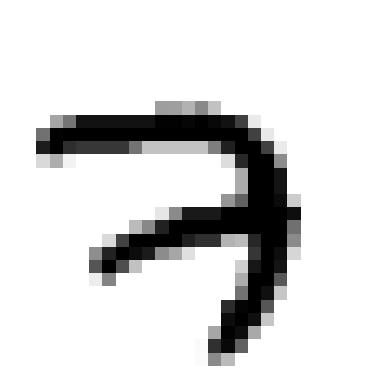

7

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

## writing samples to TensorBoard

In [11]:
## Get unique timestamp
import time
def get_timestamp():
    return time.asctime().replace(" ", "_").replace(":", "")

In [12]:
get_timestamp()

'Tue_Oct_17_151016_2023'

In [13]:
def get_log_dir_path(log_dir = "log/fit"):
    log_path = os.path.join(log_dir, get_timestamp())
    print(f"logs will be saved at: {log_path}")
    return log_path

In [14]:
log_dir = get_log_dir_path()
log_dir

logs will be saved at: log/fit\Tue_Oct_17_151016_2023


'log/fit\\Tue_Oct_17_151016_2023'

In [15]:
file_writer = tf.summary.create_file_writer(logdir=log_dir)

In [16]:
with file_writer.as_default():
    images = np.reshape(X_train[10:30], (-1, 28,28,1))
    tf.summary.image("20 handwritten digit samples", images, max_outputs = 25, step= 0)

In [19]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
%tensorboard --logdir log/fit --host localhost

In [27]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape = [28, 28], name= "inputLayer"),
    tf.keras.layers.Dense(300, activation='relu', name = "hiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name = "hiddenLayer2"),
    tf.keras.layers.Dense(10, activation = "Softmax", name= "outputLayer")
]

In [28]:
model = tf.keras.models.Sequential(LAYERS)

In [29]:
model.layers

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
print(784 * 300 + 300), # hidden layer 1 (total input * Dense_hidden_1 + bias)
print(300 * 100 + 100),  # hidden layer 2 (Dense_hidden_1 * Dense_hidden_2 + bias)
print(100 * 10  + 10),   # output layer  (Dense_hidden_2 * Dense_output + bias)

235500
30100
1010


(None,)

In [32]:
sum([784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10 ])

266610

In [33]:
hidden1 = model.layers[1]
model.get_layer(hidden1.name)

In [34]:
hidden1.get_weights() # it is giving both weights and biases

[array([[ 0.04073117, -0.05500909, -0.01259216, ...,  0.02168392,
         -0.02690719, -0.03176191],
        [-0.02437023,  0.05213402, -0.02121194, ..., -0.02761635,
          0.03599076, -0.04554957],
        [-0.02895126,  0.0608132 ,  0.07241794, ..., -0.02168467,
         -0.03718844,  0.06479283],
        ...,
        [-0.03346567,  0.01128928,  0.01110867, ..., -0.05304378,
         -0.00210976, -0.06754827],
        [ 0.06835672,  0.04107565, -0.01257788, ...,  0.06630699,
          0.03103195, -0.00172386],
        [ 0.05429904,  0.01685835, -0.00425987, ..., -0.03920215,
          0.03668609,  0.05357243]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [35]:
weights, biases = hidden1.get_weights()

In [36]:
weights.shape

(784, 300)

In [37]:
biases.shape

(300,)

***loss_function(actual, pred) = pred***

In [38]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss = LOSS_FUNCTION,
              optimizer = OPTIMIZER,
              metrics= METRICS)

Important
  * **Epochs**: Integer.
  Number of  epochs to train the model. An epoch is an iteration over the entire x and y data provided.

  * **batch_size**: integer or None
  Number of sample per gradient update. if unspecified, batch_size will default to 32. <br>
  NOTE: Do not specify the batch if your data is in the form of dataset, generators or keras.utils.Sequence instances (since they  generate batches)

  * **validation_batch_size**: Integer or None.
  NUmber of samples per validation batch. <br>
  if unspecified, will default to batch size. <br>
  NOTE: Do not specify validation_batch_size if your data is in the form of datasets, generators or keras.utils.Sequence instances (since they  generate batches)


Callbacks

TensorBoard Callbacks

In [39]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir= log_dir)

-early stopping

In [40]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)

## Checkpoint

In [41]:
CKPT_Path = "model_ckpt.h5"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_Path, save_best_only=True)

In [42]:
LIST_OF_CALLBACKS = [tensorboard_cb, early_stopping_cb, checkpoint_cb]

In [43]:
EPOCHS = 300
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs = EPOCHS,
                  validation_data =VALIDATION_SET)

Epoch 1/300
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6210 - accuracy: 0.8384 - val_loss: 0.3018 - val_accuracy: 0.9178
Epoch 2/300
1719/1719 [==============================] - 9s 6ms/step - loss: 0.2923 - accuracy: 0.9165 - val_loss: 0.2403 - val_accuracy: 0.9322
Epoch 3/300
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2401 - accuracy: 0.9316 - val_loss: 0.2061 - val_accuracy: 0.9440
Epoch 4/300
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2061 - accuracy: 0.9406 - val_loss: 0.1844 - val_accuracy: 0.9498
Epoch 5/300
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1805 - accuracy: 0.9488 - val_loss: 0.1700 - val_accuracy: 0.9530
Epoch 6/300
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1606 - accuracy: 0.9545 - val_loss: 0.1468 - val_accuracy: 0.9608
Epoch 7/300
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1445 - accuracy: 0.9589 - val_loss: 0.1408 - va

In [36]:
 55000 / 32  # from above cell we can say that 1719 is nothing but it showing the total batches to train

1718.75

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9781


[0.0692133828997612, 0.9781000018119812]

In [38]:
model.save("model.h5")

In [55]:
loaded_model = tf.keras.models.load_model("model.h5")

In [56]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0850 - accuracy: 0.9738


[0.0849754810333252, 0.973800003528595]

In [57]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.077513,0.978836,0.092784,0.9742
1,0.072195,0.980600,0.090981,0.9746
2,0.067328,0.982382,0.087104,0.9750
3,0.062676,0.983200,0.089296,0.9732
4,0.058955,0.984382,0.086910,0.9756


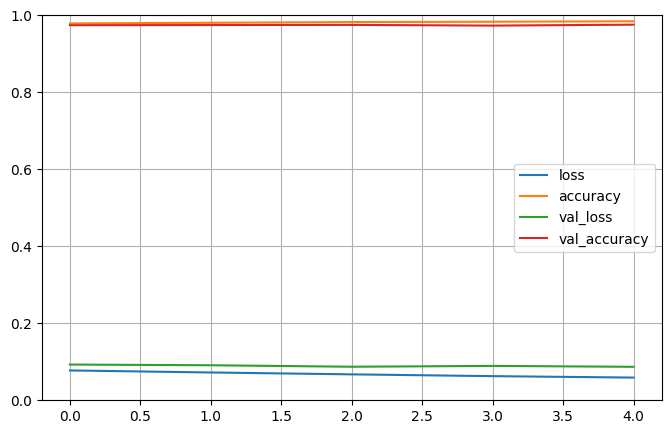

In [58]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [59]:
X_new = X_test[:3]
y_new =  y_test[:3]

y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 194ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [60]:
y_pred = np.argmax(y_proba, axis = 1)
y_pred, y_new

(array([7, 2, 1], dtype=int64), array([7, 2, 1], dtype=uint8))

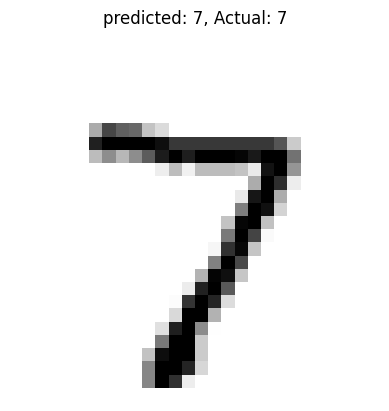

------------------------------------------------------------


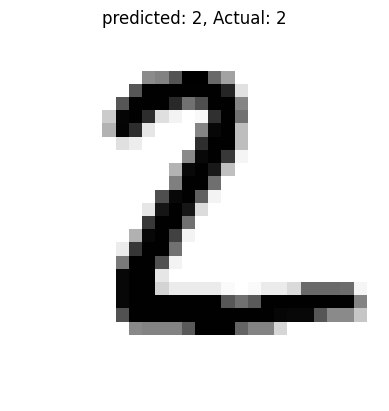

------------------------------------------------------------


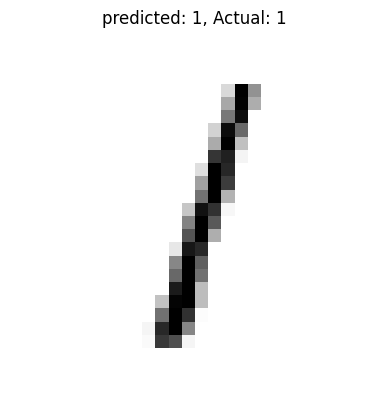

------------------------------------------------------------


In [61]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data,  cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [66]:
ckpt_model = tf.keras.models.load_model(CKPT_Path)


ckpt_history = ckpt_model.fit(X_train, y_train, epochs = EPOCHS,
                  validation_data =VALIDATION_SET)

OSError: No file or directory found at model_ckpt.h5